In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
sns.set(rc={'figure.figsize':(11.7,7.27)})


In [57]:

df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
# Check Null Values: 

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [59]:
# Convert features with object data type into string
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [60]:
df.nunique().to_frame().rename(columns={0: 'parameters'})

,parameters
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


# EDA 

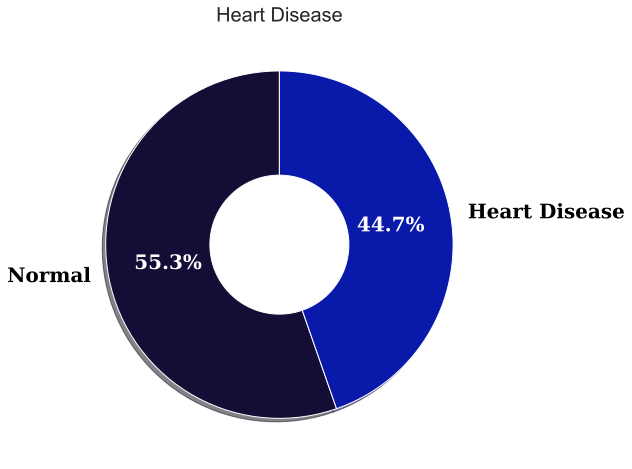

In [61]:
pie_colors = ('#140E36', '#091AAB')
categorical = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 
               'ST_Slope', 'HeartDisease']

pred_classes = df.HeartDisease.value_counts()

plt.figure(figsize=(20, 8))
patches, texts, pcts = plt.pie(pred_classes,
        labels=['Normal', 'Heart Disease'],
        colors=pie_colors,
        pctdistance=0.65,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 20,
                   'color': 'black',
                   'weight': 'bold',
                   'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Heart Disease', size=20)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

## Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

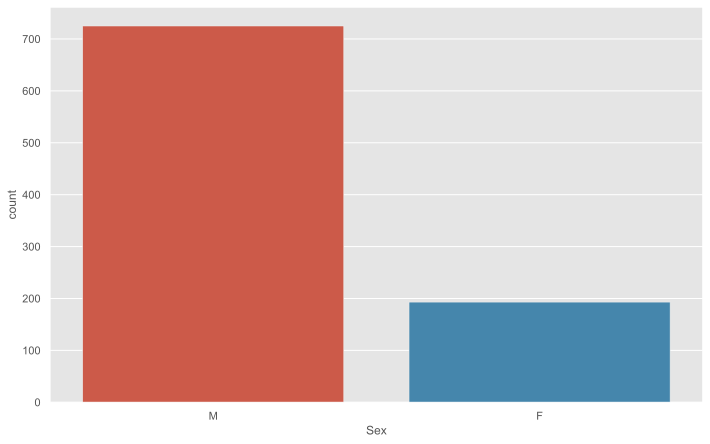

In [62]:
plt.style.use('ggplot')
sns.countplot(x=categorical[0],data=df)

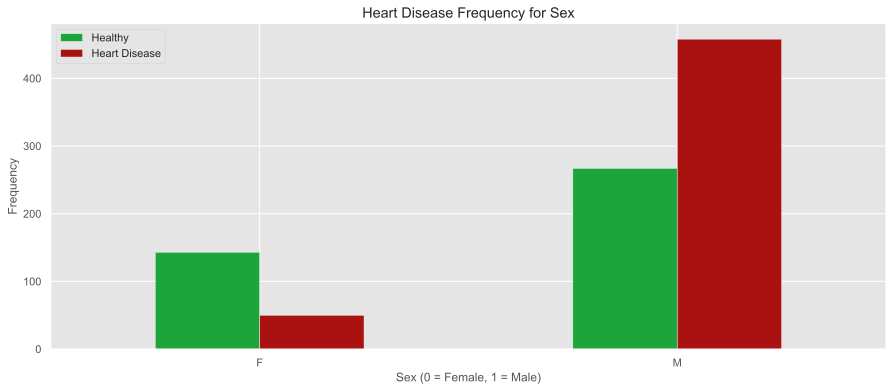

In [63]:
pd.crosstab(df.Sex,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Healthy", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

**Around 75% to 85% records are from male individuals and males have higher chance of heart disease**

## ChestPain

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

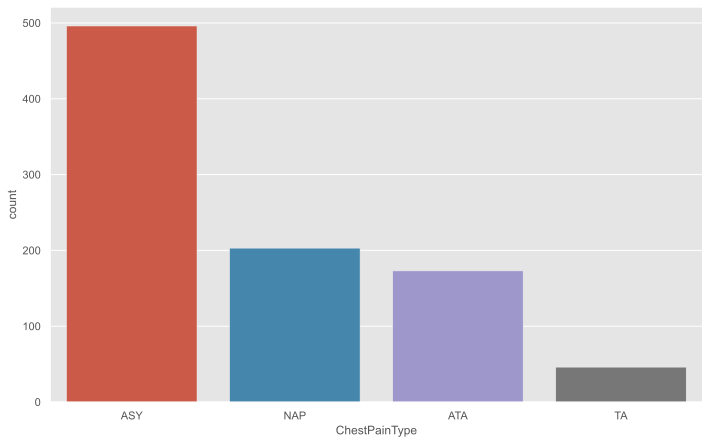

In [64]:
categorical = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 
               'ST_Slope', 'HeartDisease']

sns.countplot(x=categorical[1],data=df, order=df[categorical[1]].value_counts().index)

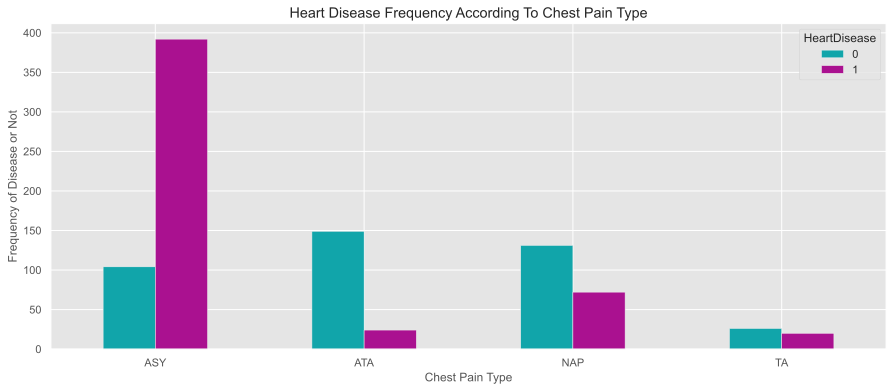

In [65]:
pd.crosstab(df.ChestPainType,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**(Asymptomatic) myocardial ischemia is the most common chest pain type while the least common is TA and person with ASY have higer chance of heart Diesease**

## Slope of ST

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

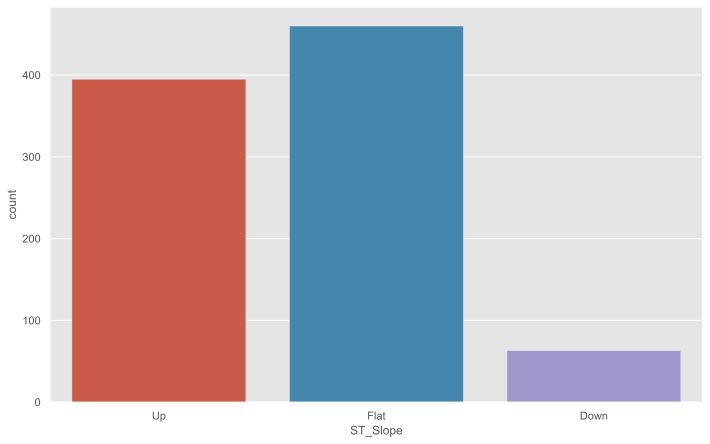

In [66]:
plt.style.use('ggplot')
sns.countplot(x=categorical[5],data=df)

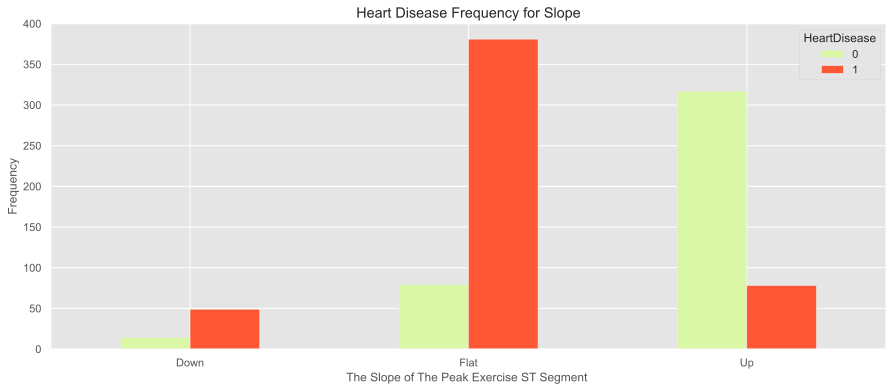

In [67]:
pd.crosstab(df.ST_Slope,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## RestingECG

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

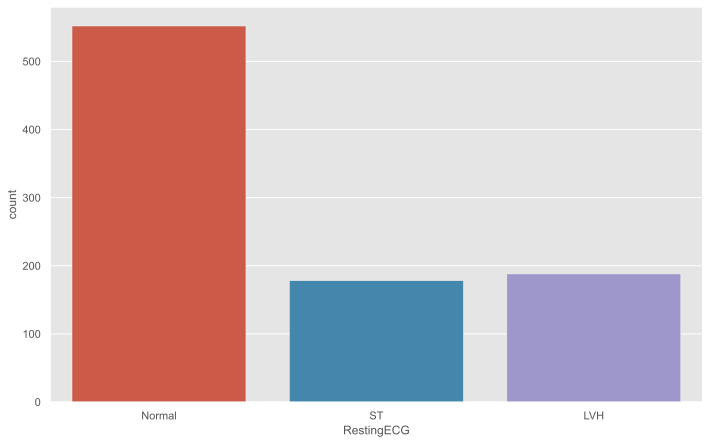

In [68]:
plt.style.use('ggplot')
sns.countplot(x=categorical[3],data=df)

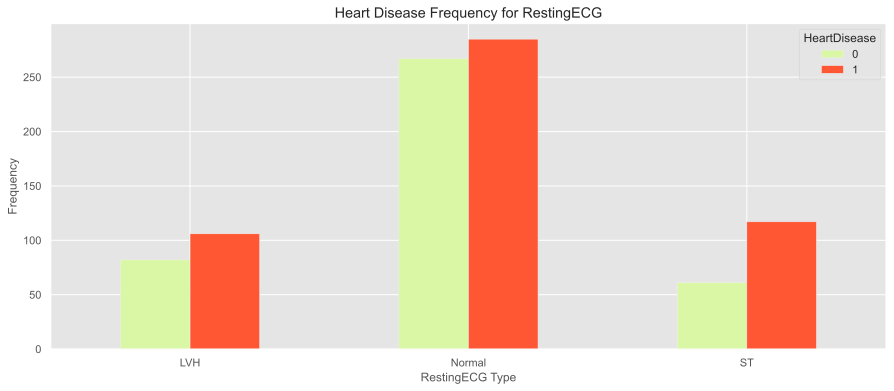

In [69]:
pd.crosstab(df.RestingECG,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for RestingECG')
plt.xlabel('RestingECG Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## ExerciseAngina

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

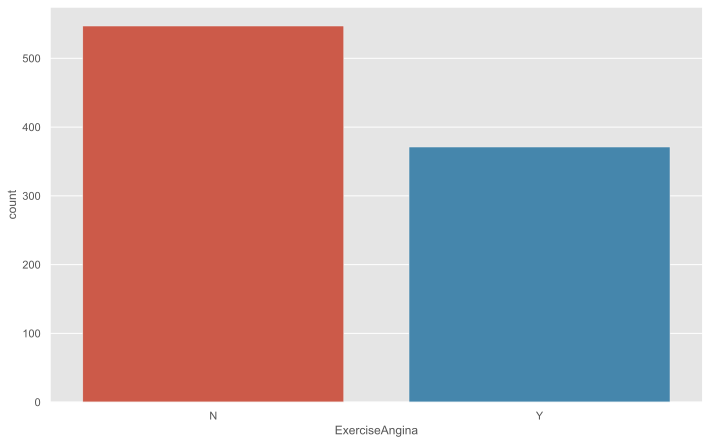

In [70]:
plt.style.use('ggplot')
sns.countplot(x=categorical[4],data=df)

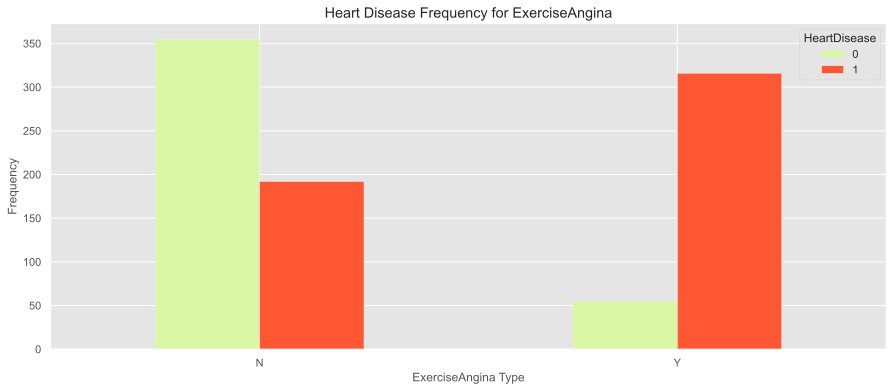

In [71]:
pd.crosstab(df.ExerciseAngina,df.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for ExerciseAngina')
plt.xlabel('ExerciseAngina Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

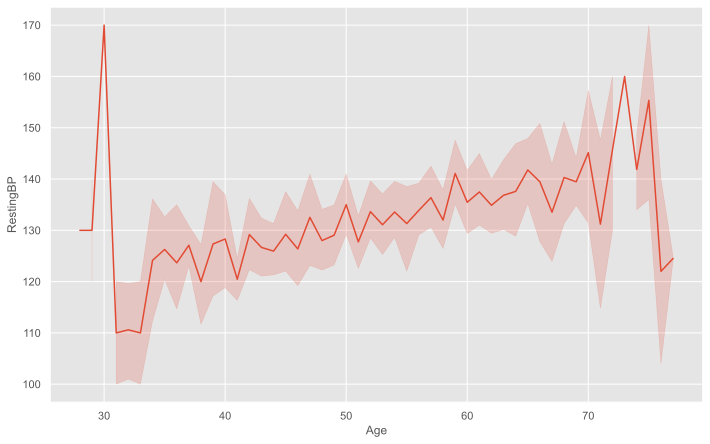

In [72]:
sns.lineplot(x=df['Age'],y=df['RestingBP'],data=df)

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

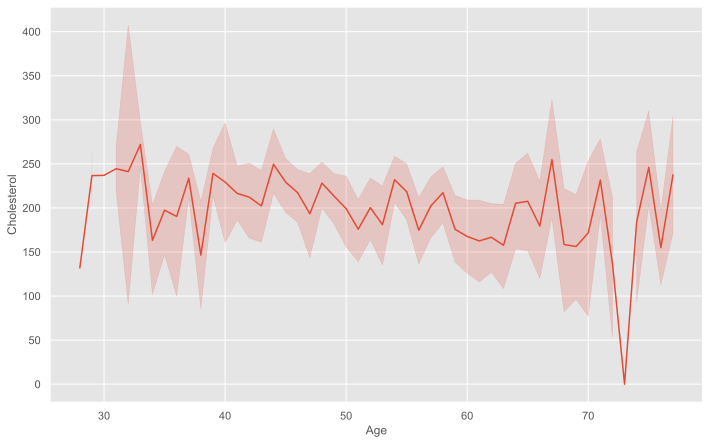

In [73]:
sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

Text(0.5, 1.0, 'Correlation of the features')

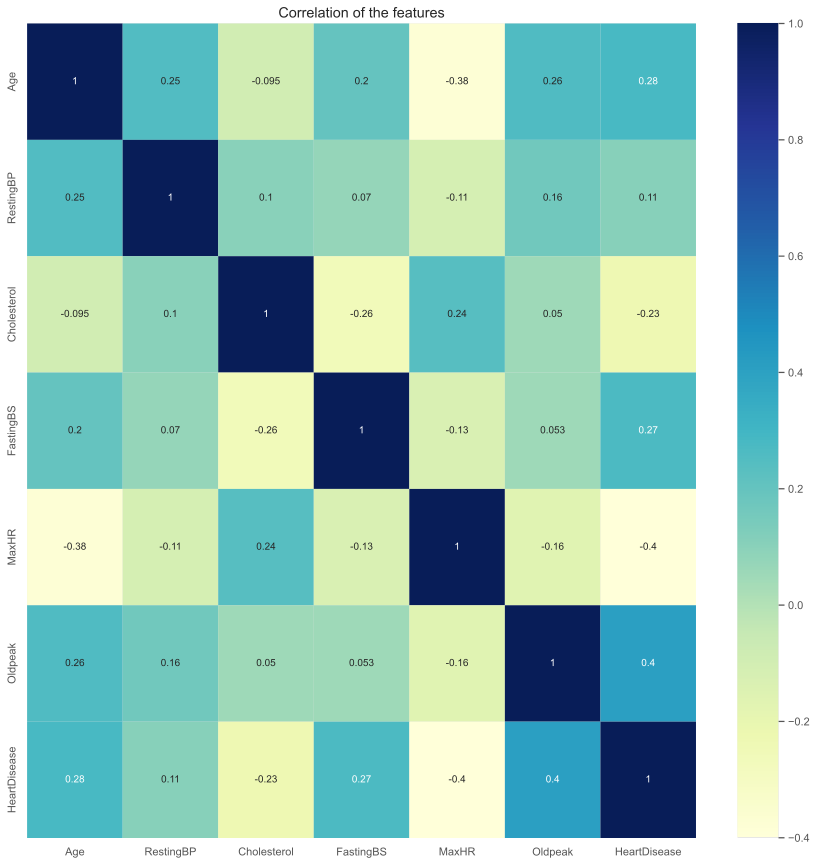

In [74]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu");
plt.title('Correlation of the features')

In [75]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])
df['ExerciseAngina'] = encoder.fit_transform(df['ExerciseAngina'])

In [76]:
df[0:10]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [77]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['HeartDisease'])
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

<!-- <h1>KNN</h1>
 -->

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knnmodel = knn.fit(X_train, y_train)
knnscore = knnmodel.score(X_test, y_test)*100
# 
# evaluating the model
print("Training Accuracy :", knnmodel.score(X_train, y_train))
print("Testing Accuracy :", knnmodel.score(X_test, y_test))

Training Accuracy : 0.7929155313351499
Testing Accuracy : 0.7010869565217391


c:\Users\Rochak\miniconda3\envs\mp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\Rochak\miniconda3\envs\mp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\Rochak\miniconda3\envs\mp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


c:\Users\Rochak\miniconda3\envs\mp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


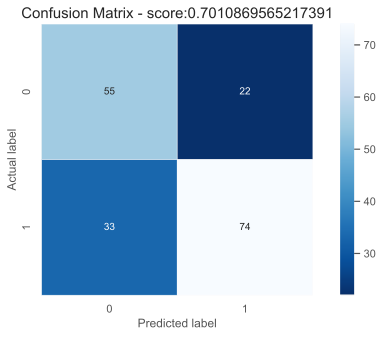

              precision    recall  f1-score   support

           0       0.62      0.71      0.67        77
           1       0.77      0.69      0.73       107

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



In [79]:
from sklearn import metrics
y_pred=knnmodel.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
knn_auc = roc_auc_score(y_test, knnmodel.predict(X_test))
knn_fpr, knn_tpr, _ = roc_curve(y_test, knnmodel.predict(X_test))

c:\Users\Rochak\miniconda3\envs\mp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\Rochak\miniconda3\envs\mp\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


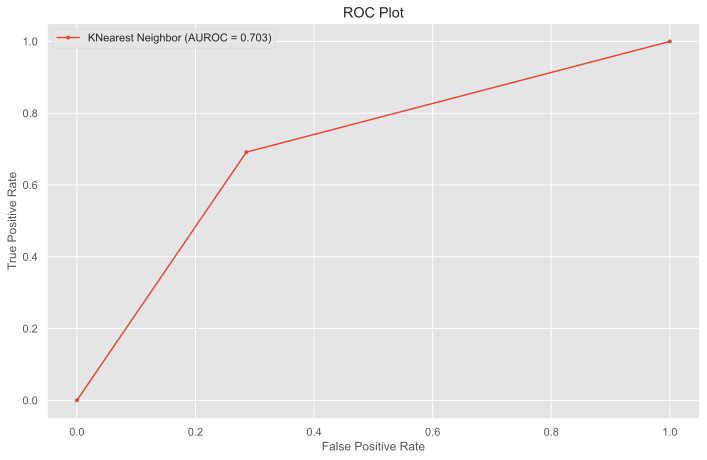

In [81]:

plt.plot(knn_fpr, knn_tpr, marker='.', label='KNearest Neighbor (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()